In [2]:
#import necessary libraries
import pandas as pd
import numpy as np

# download the Titanic data from https://hbiostat.org/data/repo/titanic3.csv as a CSV file (download links in the upper right) named titanic3.csv and save it to the hello_ds folder
data = pd.read_csv('titanic3.csv')
#sibsp = siblings or spouse, parch = parents or children
#data.head(5)

In [3]:
#replace the question marks in the age and fare columns with the numpy NaN value
data.replace('?', np.nan, inplace=True)
data.astype({"age":np.float64, "fare":np.float64})



,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [4]:
#import plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='survived', ylabel='fare'>

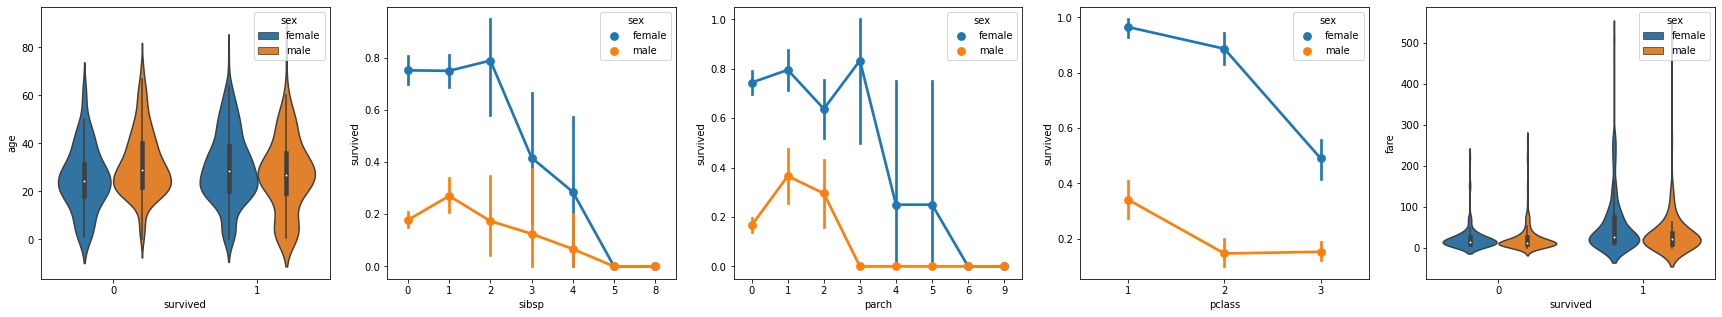

In [5]:
#ver 1
fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

<AxesSubplot:xlabel='age', ylabel='pclass'>

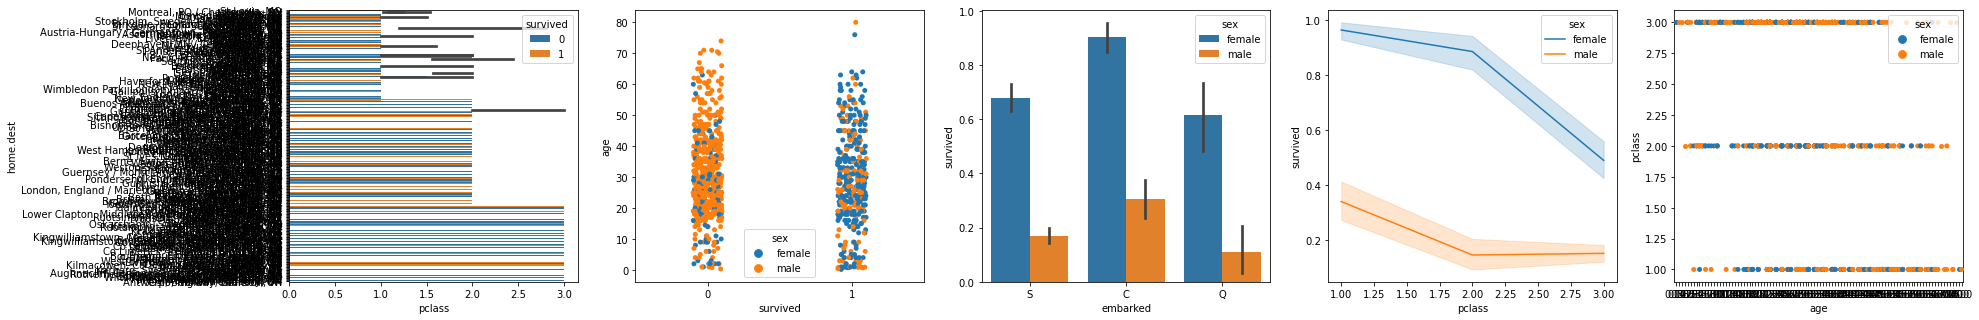

In [8]:
#ver 2 different plots more resources in seaborn documentation http://seaborn.pydata.org/examples/index.html
fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.barplot(y="home.dest", x="pclass", hue="survived", data=data, ax=axs[0])
sns.stripplot(x="survived", y="age", hue="sex", data=data, ax=axs[1])
sns.barplot(x="embarked", y="survived", hue="sex", data=data, ax=axs[2])
sns.lineplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.stripplot(x="age", y="pclass", hue="sex", data=data, ax=axs[4])

In [10]:
#correlations with pandas
data.replace({'male': 1, 'female': 0}, inplace=True) #replace gender from string to numeric

#data.corr().abs()
data.corr().abs()[["survived"]] #gender seems to have higher correlation to survival..

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN


In [12]:
# hypothesis >>> sibsp and parch are related in how they affect survivability
# group them into a new column called "relatives" to see whether the combination of them has a higher correlation to survivability.

data['relatives'] = data.apply(lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1) #if for a given passenger the number of sibsp and parch is greater than 0, then they had a relative on board

data.corr().abs()[["survived"]] #still lower correlation than passenger class pclass, but higher than individual sibsp and parch


,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN
relatives,0.201719


In [14]:
#drop from the dataset the low value sibsp and parch columns, along with any rows that had NaN values, 
# to end up with a dataset that can be used for training a model

data = data[['sex', 'pclass', 'age', 'relatives', 'fare', 'survived']].dropna()

data.corr().abs()[["survived"]]

,survived
sex,0.537719
pclass,0.319979
age,0.053957
relatives,0.206754
fare,0.249164
survived,1.000000
